**In this notebook we'll format, clean, and preprocess raw input data.**

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

from module2_scripts.formatter import Formatter
from module2_scripts.separator import Separator
from module2_scripts.preprocessor import Preprocessor
from module2_scripts.cleaner import DatasetCleaner

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset as pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [3]:
#intialize Formatter instance object
df_formatted = Formatter(df)

In [4]:
#call _initial_formatting() method to update obj.df attribute
#this method fills all NaN values to 0 and converts any date columns to datetime format
df_formatted.initial_formatting()

=== Beginning initial formatting phase ===

Filled all NaN values with 0!
Converted column 'date' to datetime format!

=== Completed initial formatting ===


In [5]:
#call ._flagger() method to scan each col in obj.df and return summary reports 
#this method scans the dataframe for columns with Object dtypes and displays them
#because Object dtypes may have inconsistent data formats
#the method tries to convert all the values in the column to numeric and returns 
#the number of sucessful conversions and the number of failures, along with all
#the unique values that failed to convert to numeric
#this method also displays the top 5 value counts for reference
#the failed-to-convert values need to be cleaned up in order to proceed with the analysis
df_formatted.flagger()

=== Beginning scanning dataframe for any inconsistent data formats ===

COLUMN: sqft_basement
This column is of dtype Object, so it may have inconsistent data formats. Please check summary info below and make necessary amendments!

   ==Summary report of column scan==	   ==Top 5 value counts==


sqft_basement 
 
 
 
 
 n_col_data 
 21597 
 
 
 n_unique 
 304 
 
 
 n_converted_to_num_success 
 21143 
 
 
 n_converted_to_num_failure 
 454 
 
 
 fails_unique_values 
 {?} 
 
 
       
 
 
 
 value 
 count 
 
 
 
 
 1 
 0 
 12826 
 
 
 2 
 ? 
 454 
 
 
 3 
 600 
 217 
 
 
 4 
 500 
 209 
 
 
 5 
 700 
 208



=== Finished scanning dataframe ===


Taking a look at the formatting flag above, we see that the column "sqft_basement" is of dtype object, and that the method was able to successfully convert 21,143 values to numerical type, and failed to convert 454 values. Looking at the unique values of all the failures, we see that there is only 1 - '?' -. We also see that this value has the second highest count in the dataset, which is problematic. It's likely best to convert all the '?' values to 0 instead for simplicity. 

In [6]:
#the method below reformats data by replacing specified values in the specified columns
#and updates obj.df
df_formatted.reformat_data_input(col='sqft_basement', value_replace={'?': 0})

Successfully converted all values of '?' in column 'sqft_basement' to '0'!


Now we've successfuly converted all the '?' values to 0! Let's run the ._flagger() method again to see if there's any remaining issues.

In [7]:
df_formatted.flagger()

=== Beginning scanning dataframe for any inconsistent data formats ===
=== Finished scanning dataframe ===


No other issues! The dataframe is successfully formatted. Now, we move on to separation of continuous and categorical values.

In [8]:
df_formatted.df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [9]:
#initialize Separator instance object
df_separated = Separator(
    df=df_formatted.df, 
    dep_var='price', 
    n_unique_threshold=5, 
    drop_cols='id'
)

Above we've initialized a Separator object and passed in some arguments. We passed in the main dataframe, which we've formatted in the previous step. We passed in the 'dep_var' argument, which means dependent variable. In our dataset, 'price' is the depedent variable. We passed in the cutoff value with which the method uses to distinguish between categorical and continuous columns based on the number of unique values in the column. Looking at the data 2 cells above which displays the number of unique values in each column, a threshold of 117 looks to be good enough to place so that continuous and categorical values are separated. Note that this split isn't set in stone either, this class comes with methods to manually re-arrange the classifications, which we will actually do shortly. More info on the arguments are in the docstrings of the separator module. 

We also drop the 'id' column here, and this column won't appear anywhere in our analysis. This column doesn't serve us any purpose.

In [10]:
#this method disregards the dependent variable column and distinguishes between continuous
#and categorical variable columns based on a threshold of the number of unique values in each column
#and then displays the split. the dependent var and threshold are set when intiializing the object
df_separated.split_categorical_continuous()

=== Beginning process of separating continuous and categorical variable columns ===

Continuous variable columns: 
['date' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'grade'
 'sqft_above' 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat'
 'long' 'sqft_living15' 'sqft_lot15']
Categorical variable columns: 
['waterfront' 'view' 'condition']

=== Completed separating continuous and categorical variables ===


In [11]:
df_separated.df_cont.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,3,1.00,1180,5650,1.0,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,3,2.25,2570,7242,2.0,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2,1.00,770,10000,1.0,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,4,3.00,1960,5000,1.0,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,3,2.00,1680,8080,1.0,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
df_separated.df_cat.head()

,waterfront,view,condition
0,0.0,0.0,3
1,0.0,0.0,3
2,0.0,0.0,3
3,0.0,0.0,5
4,0.0,0.0,3


Above we see the column splits. All seems to look okay, but one thing to note is that we saw in the formatting phase, that the column 'sqft_basement' is a continuous column. However, over half the dataset has a value of 0! This is likely to interfere the accuracy of our models if we were to continue treating this column as a continuous data column. So as a solution, let's actually convert this column to a binary categorical column, i.e. change the values so that it is 0 if the original value is 0 or 1 if the original value is anything greater than 0. Now the column would essentially just represent if there is a basement (1) or not (0).

In [13]:
#this method allows for manual re-categorization between continious and categorical values
#and updates the continuious dataframe (obj.df_cont) and categorical dataframe (obj.df_cat) accordingly
df_separated.manual_separation_override(_from='cont', _to='cat', cols=['sqft_basement', 'zipcode'])
df_separated.manual_separation_override(_from='cat', _to='cont', cols=['condition'])

=== Beginning manual amendments/overrides of continuous and categorical variable column separation ===

Amended Continuous variable columns: 
['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Amended Categorical variable columns: 
['waterfront', 'view', 'condition', 'sqft_basement', 'zipcode']

=== Completed manual override ===
=== Beginning manual amendments/overrides of continuous and categorical variable column separation ===

Amended Continuous variable columns: 
['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition']

Amended Categorical variable columns: 
['waterfront', 'view', 'sqft_basement', 'zipcode']

=== Completed manual override ===


We can see the amended columns above, looks like the re-classification was a success!

In [14]:
#this method allows for manual transformation of continuous to binary categorical values 
#and updates obj.df and obj.df_cat attributes. the .manual_seperation_override() method 
#should be run before this step to move the relevant column from the continuious dataframe
#to the categorical dataframe
df_separated.manual_continuous_to_categorical_transform_binary(cols=['sqft_basement'])

=== Beginning process of manually converting continious variables into binary categorical variables ===

 Converting column: sqft_basement

=== Completed manual continuous to binary categorical override conversion ===


In [15]:
df_separated.df['sqft_basement'].unique()

array([0, 1], dtype=int64)

The above cell execution converts the values in the 'sqft_basement' column to binary figures. Looking at the unique values for this column, we see that it was successful.

In [16]:
#initialize DatasetCleaner instance object
df_clean = DatasetCleaner(
    df=df_separated.df, 
    dep_var='price', 
    continuous_cols=df_separated.df_cont.columns.values.tolist(), 
    categorical_cols=df_separated.df_cat.columns.values.tolist(), 
    exceptions=['date', 'lat', 'long', 'zipcode']
)

Above we've initialized a DatasetCleaner object, passing in the df to be cleaned, the dependent variable, a list of continuous column names, a list of categorical column names, and exceptions. More info on the arguments are in the docstrings of the cleaner module. The exceptions passed in are the columns 'date', 'lat', 'long', and 'zipcode'. We don't want to clean these because these aren't are really data points but moreso "descriptions" of data points. For example, you wouldn't run a summary report on the zipcode column and look at the values' standard deviation, mean etc. as the zipcodes are moreso nouns rather than numerical values.

----------Displaying frequency distributions with KDE overlay and column summary reports----------


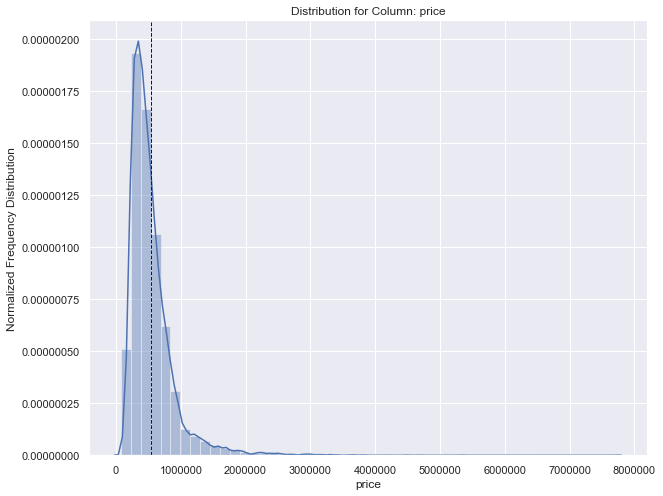

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,price
type,dep_var
n,21597
mean,540297
median,450000
stdev,367368
skew,4.02336
kurtosis,34.5414
max,7.7e+06
min,78000


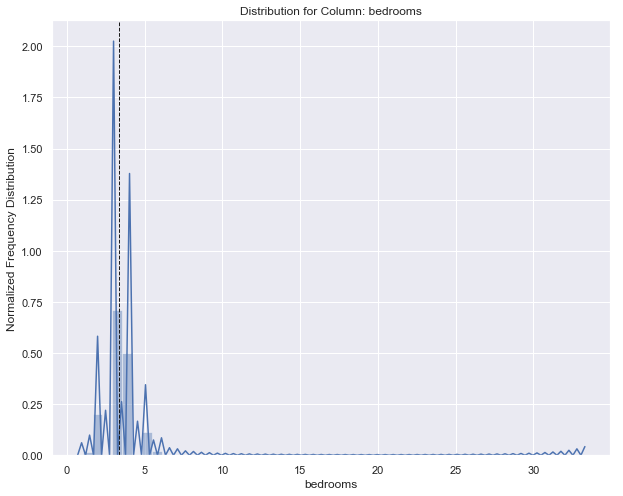

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,bedrooms
type,continuous
n,21597
mean,3.3732
median,3
stdev,0.926299
skew,2.02364
kurtosis,49.8218
max,33
min,1


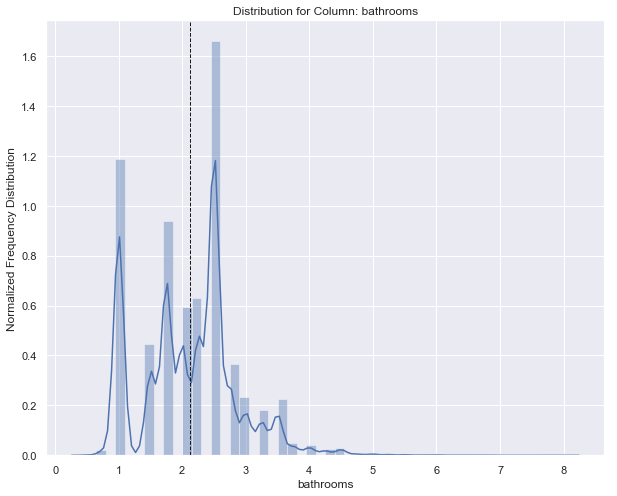

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,bathrooms
type,continuous
n,21597
mean,2.11583
median,2.25
stdev,0.768984
skew,0.519709
kurtosis,1.27932
max,8
min,0.5


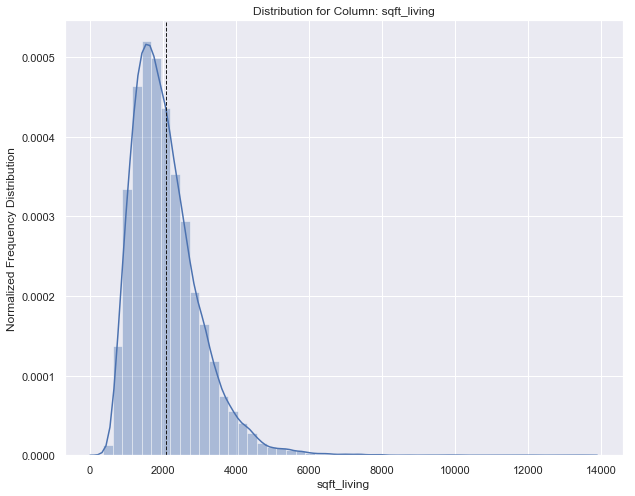

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_living
type,continuous
n,21597
mean,2080.32
median,1910
stdev,918.106
skew,1.47322
kurtosis,5.2521
max,13540
min,370


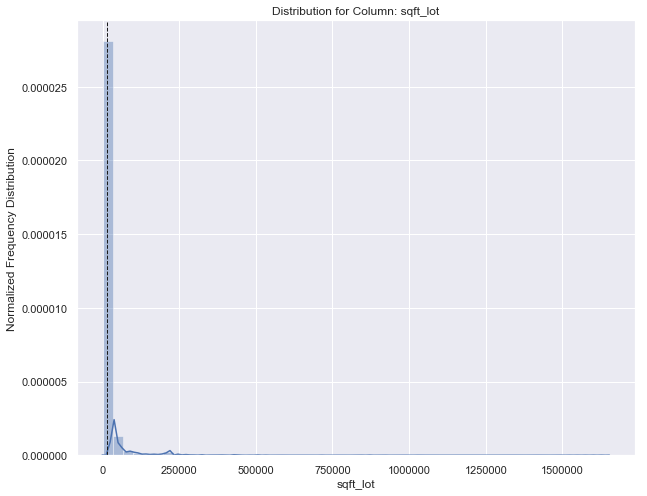

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_lot
type,continuous
n,21597
mean,15099.4
median,7618
stdev,41412.6
skew,13.0726
kurtosis,285.496
max,1651359
min,520


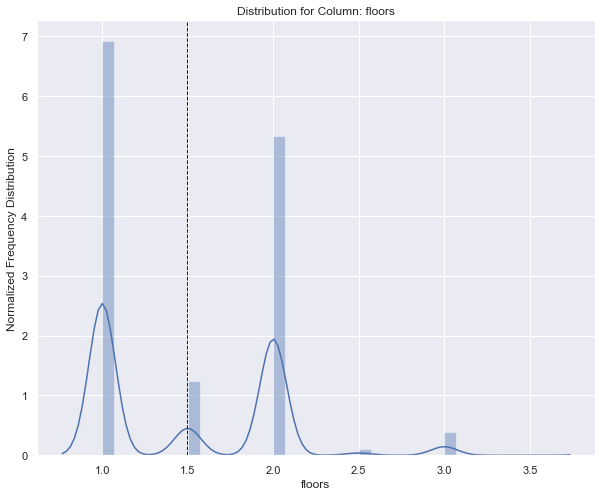

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,floors
type,continuous
n,21597
mean,1.4941
median,1.5
stdev,0.539683
skew,0.614497
kurtosis,-0.491066
max,3.5
min,1


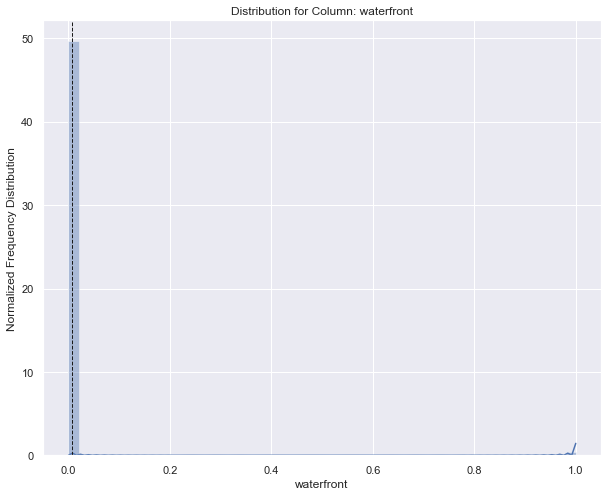

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,waterfront
type,categorical
n,21597
mean,0.0067602
median,0
stdev,0.0819439
skew,12.0396
kurtosis,142.965
max,1
min,0


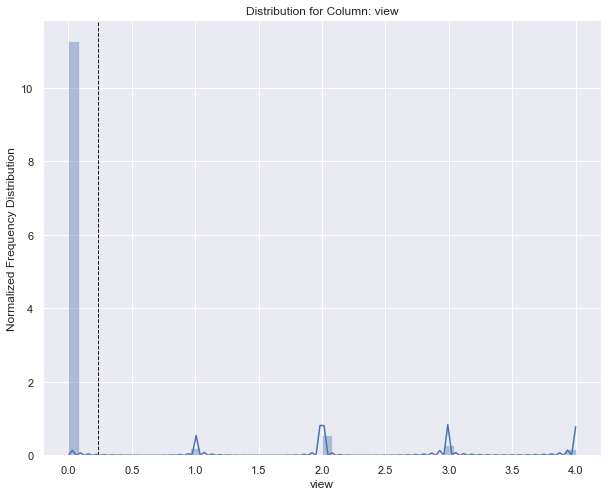

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,view
type,categorical
n,21597
mean,0.233181
median,0
stdev,0.764673
skew,3.4057
kurtosis,10.965
max,4
min,0


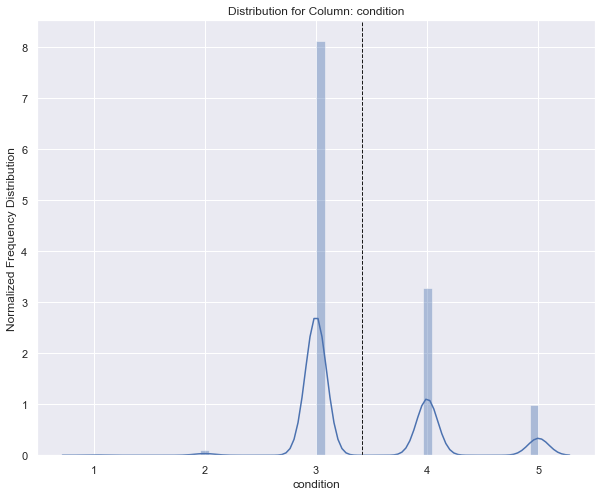

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,condition
type,continuous
n,21597
mean,3.40983
median,3
stdev,0.650546
skew,1.03604
kurtosis,0.519237
max,5
min,1


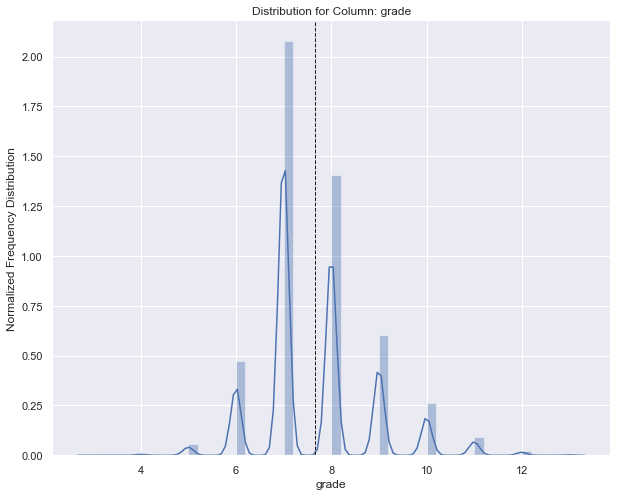

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,grade
type,continuous
n,21597
mean,7.65792
median,7
stdev,1.1732
skew,0.788237
kurtosis,1.13515
max,13
min,3


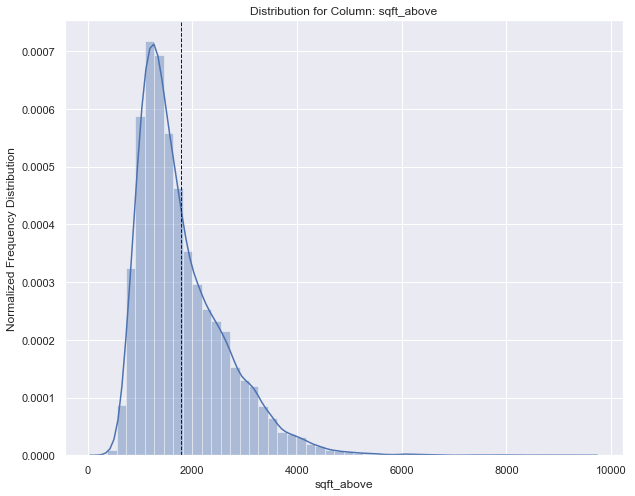

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_above
type,continuous
n,21597
mean,1788.6
median,1560
stdev,827.76
skew,1.44743
kurtosis,3.40552
max,9410
min,370


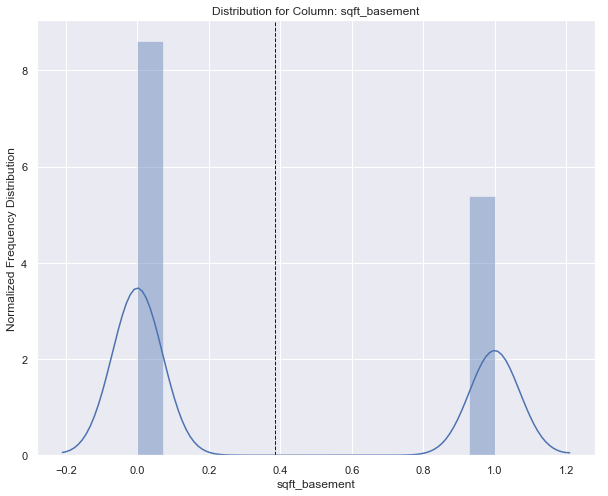

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_basement
type,categorical
n,21597
mean,0.3851
median,0
stdev,0.48663
skew,0.472272
kurtosis,-1.77712
max,1
min,0


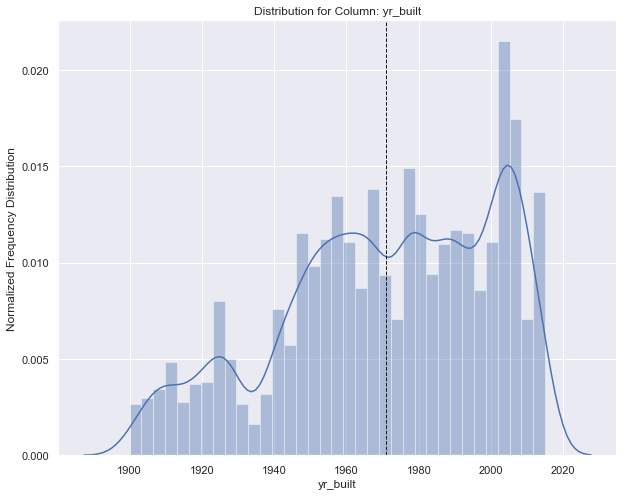

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,yr_built
type,continuous
n,21597
mean,1971
median,1975
stdev,29.3752
skew,-0.46945
kurtosis,-0.657694
max,2015
min,1900


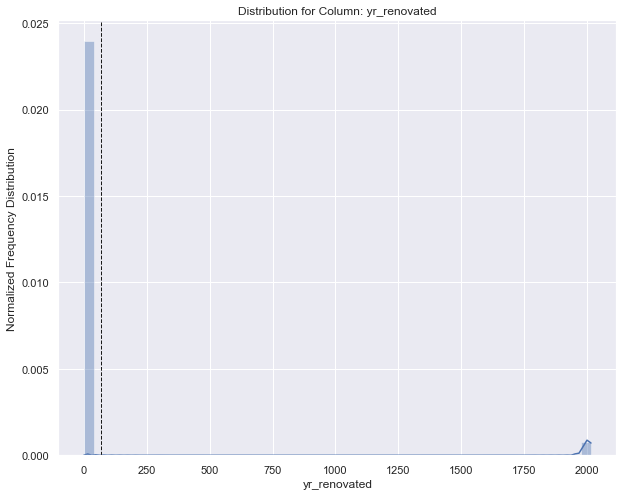

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,yr_renovated
type,continuous
n,21597
mean,68.7582
median,0
stdev,364.037
skew,5.10615
kurtosis,24.0769
max,2015
min,0


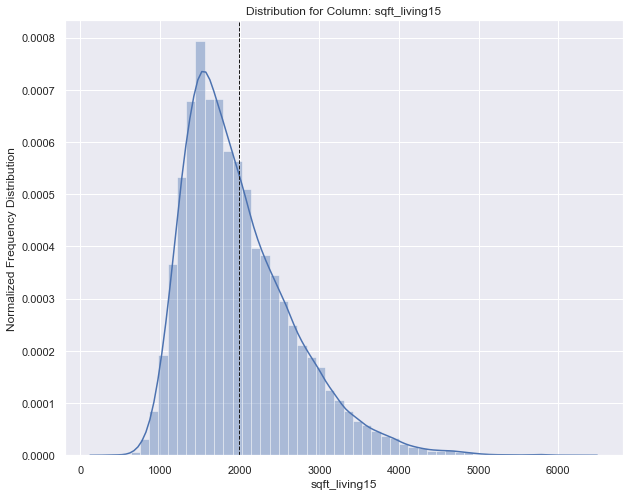

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_living15
type,continuous
n,21597
mean,1986.62
median,1840
stdev,685.23
skew,1.10688
kurtosis,1.59173
max,6210
min,399


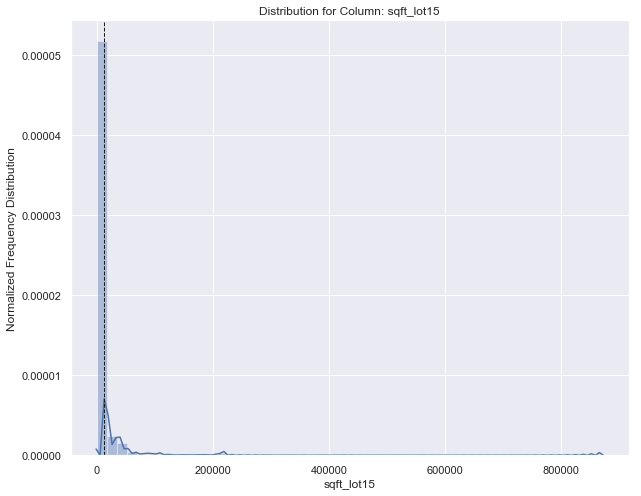

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_lot15
type,continuous
n,21597
mean,12758.3
median,7620
stdev,27274.4
skew,9.52436
kurtosis,151.396
max,871200
min,651


In [17]:
#this method displays summary information for each column in obj.df (less exceptions)
#for the purpose of cleaning where necessary. for each column, the method displays
#a histogram with KDE overlay, as well as 3 dataframes, one is a summary report, and the other 
#two are the bottom and top 10 value counts, sorted by highest value to lowest
df_clean.display_summary_report()

The above cell execution outputs a lot of information. Now we're able to visualize the distribution, and take a look at a summary report of the column values which will help us determine how to clean the column, and set a minimum and maximum range of values to keep. Let's run through each of the columns' reports:

**price** - This is our dependent variable, i.e. the target variable we will try to predict using this model. Visually we see a highly leptokurtic distribution with a kurtosis of +34.5414 and a strong positive skew of +4.02336. The distribution is stretched out in the horizontal axis with a sharper peak, which means that the majority of data are in a narrower vertical range and there are more outliers. We also see a long right tail and the majority of the distribution lying to the left of the mean, indicating positive skewness and the presence of more outliers in the higher price ranges. Looking at the bottom 10 value counts and the maximum of the values, we can see a clear reason why this is. The max value is 7.7 mio while the median of the dataset is only 450k. Also, the 99.5% percentile value is ~2.45 mio, so everything points to this 7.7 mio value being a severe outlier. For this column, we'll set the acceptable range as the values in between the ~0.005% - ~99.95% percentile range. 


**bedrooms** - This is a categorical variable that represents the number of bedrooms in the unit. We see the same picture as the price distribution, a highly leptokurtic distribution with strong positive skewness, signaling a majority of the distribution to be clustered to the left of the mean and some strong outliers in the right tail, meaning somewhere there is a datapoint reflecting a very large number of bedrooms. We can see exactly this in the value counts dataframes. There are only 12 unique values in this whole column, and we can see that there is 1 datapoint with a value of 33, which is the clear outlier. For this, we'll set the acceptable range of values to 0-11. Although the 99.95% percentile value is 6, there isn't a high count of datapoint with values above this range, so we'll deem it okay to include some of those higher values, just not the extreme outlier. We also want to take into account that we have to find a balance between removing outliers but at the same time not losing too much data.

**bathrooms** - This is a categorical variable that represents the number of bathrooms in the unit. This distribution looks okay, we see that the mean and median values are close to each other, there is a moderate positive skew, indiciating data clustered to the left of the mean, and some outliers in the right tail, but not too much. Kurtosis is ~1.27, indicating a platykurtic distribution where there are shorter and thinner tails, signifying a flatter distribution with fewer outliers than in a normal distribution. Our value counts reports don't seem to flag any absurd values. All in all, this column is okay as is, so we won't include this in our cleaning configuration.

**sqft_living** - This is a continuous variable that represents the square footage in the living room of the unit. We see a leptokurtic distribution with positive skewness, so we should be on the lookout for outliers that are likely to be very high values. The max value of the distribution is ~13.5k, but the mean and median are around 2k, and the values in the 97.5% and 99.5% percentiles are ~4.2k and ~5.5k respectively. This would likely mean that the outliers are stretching to the far right of the distribution. Thus, let's set the max value to somewhere between the 97.5% - 99.5% percentile values, i.e. 5000. The final acceptable range of values will be set to 0-5000.

**sqft_lot** - This is a continuous variable that represents the square footage of the lot of the unit. We see a very highly leptokurtic distribution and very strong positive skewness, meaning there is a very high outlier somewhere in the right tail. Just be looking at the max value, we can see the culprit. The max value is ~1.65 mio while the median is only ~7.6k and the mean is ~15k. Of course, the high deviation of the mean to the rightside of the median would most likely be attributable to this outlier. After toggling with the ranges a little, I've found that there are actually quite a few outliers in the right tail, not just a few big ones. Thus, lets set the reange to 0-50,000.

**floors** - This is a categorical variable that represents the number of floors of the unit. Looking at the visualization and summary report, there seems to be no issues with the data in this column. the mean and median spread is very narrow, there is a moderate positive skew, and the distribution is platykurtic, meaning that the tails are thin and there are fewer outliers than in a normal distribution. All in all, we will not include this in our cleaning configuration. 

**waterfront** - This is a binary categorical variable that represents whether the property is a waterfront property or not. We will not be cleaning any binary variables. 

**view** - This is a categorical variable that specifies how many times the property has been viewed. The majority of properties have not been viewed at all while some have been viewed 1 or more times. Although the summary statistics of this distribution are not ideal, i.e. skewness and kurtosis are high, we'll leave this one out as well, as there are only 5 unique values. We'll have to use judgement and discretion with how we proceed to use the data in this column in the model. 

**condition** - This is a categorical variable that reports the overall condition of the unit. The summary report for these values look okay. We will not include this in our cleaning configuration. 

**grade** - This is a categorical variable that represents the overall grade given to the unit, based on the King County grading system. The distribution and summary report here looks okay. We will not include this in our cleaning configuration.

**sqft_above** - This is a continuous variable that represents the square footage of the unit excluding the basement. With a kurtosis of 3.40552, this distribution is relatively mesokurtic, leaning towards the keptokurtic side, and has a positive skew of +1.447 indiciating some outliers in the right tail. The max value is ~9.4k yet the median, 97.5% percentile, and 99.5% percentile values are ~1.5k, ~3.8k, ~4.8k. For this distribution, we'll focus on removing the few far right outliers, since the distribution is only slightly leptokurtic. Thus, we'll set a max value somewhere between the 99.5% percentile and the max. We'll set the acceptable range of values here to 0-5,000.

**sqft_basement** - This is the continuous variable that was converted to a binary categorical variable. This variable represents the square footage of the basement. We will not be cleaning any binary variables.

**yr_built** - This is a categorical variable that reflects the year the unit was built. This is a platykurtic distribution with a negative skew, which means that the majority of the distribution lies to the right of the mean and there are fewers outliers. Essentially this means that most of the units in our dataset were built more recently rather than longer ago. Given the lower absolute skewness and kurtosis, and the idea that all the units in the dataset were built in the last century, which is typically normal to see, we'll leave this column as is and will not include it in our cleaning configuration.   

**yr_renovated** - This is a categorical variable that reflects the year that the unit was renovated, if it was renovated. We can see that an overwhelmingly large part of the dataset values are 0, which means that there was never a renovation. Given that 99.32% of the values in this column are 0, we will remove this column completely from our dataset. 

**sqft_living15** - This is a continuous variable that reflects the interior housing living space for the nearest 15 neighbors. This is a platykurtic distribution that is positively skewed, signifying that the majority of the values are clustered to the left of the mean and that there are some outliers in the higher ranges. Taking a look at the maximum value and the upper quantiles reflected in the summary report, and taking into consideration the skewness and kurtosis, let's set the max range to somewhere between the 99.5% percentile value and the max. We will set the acceptable range to 0-5000.  

**sqft_lot15** - This is a continuous variable that reflects the square footage of the lots of the nearest 15 neighbors. We see an extremely high positive skew and kurtosis, signifying a very high outlier on the right tail. The median is ~7.6k and the mean is ~12.7k, further illustrating that there is a outlier in the right tail. We see that the 97.5% and 99.5% quantile values are ~60k and ~217k respectively, yet the max value is ~871k, which again, signifies that the right tail is stretched out. To strike a balance between removing outliers yet not losing too much data, let's set a max range somewhere between the 97.5% quantile and the 99.5% quantile, leaning closer towards the 99.5% quantile. We'll set the acceptable range to 0-200,000.

In [18]:
#below dictionary specifies the cleaning configurations
#where keys are columns names and values are 
#dictionaries with 'min' and 'max' keys specifying
#the numerical range of values to keep

clean_config = {
    'price': {
        'min': 130000, 
        'max': 2000000
    }, 
    'bedrooms': {
        'min': 0, 
        'max': 11
    }, 
    'sqft_living': {
        'min': 0, 
        'max': 5000
    },
    'sqft_lot': {
        'min': 0,
        'max': 50000
    },
    'sqft_above': {
        'min': 0,
        'max': 5000
    },
    'sqft_living15': {
        'min': 0,
        'max': 5000
    },
    'sqft_lot15': {
        'min': 0,
        'max': 200000
    }
}

In [19]:
#the below method updates obj.df_clean, obj.df_cont_clean, and obj.df_cat_clean
#by reading the configuration passed in and first converting all values that are 
#outside the specified ranges to None, and then dropping all rows that contain None 
#values in any place. 
df_clean.clean(clean_config)

292 (1.35% of column) data points in column 'price' outside of specified range
1 (0.0% of column) data points in column 'bedrooms' outside of specified range
211 (0.98% of column) data points in column 'sqft_living' outside of specified range
881 (4.08% of column) data points in column 'sqft_lot' outside of specified range
86 (0.4% of column) data points in column 'sqft_above' outside of specified range
22 (0.1% of column) data points in column 'sqft_living15' outside of specified range
168 (0.78% of column) data points in column 'sqft_lot15' outside of specified range

1265 (5.86% of dataframe) rows removed from overall dataframe!


The above executed code block calls the .clean() method, using the cleaning configurations we have created, to clean and update the dataframe. Note that for tighter controls, we'd ideally want the number of out-of-range values in a column to be less than or equal to 1%, and the number of total rows of data removed from the dataframe to be less than or equal to 3%. 

All of our cleaning passed the threshold test except for the 'sqft_lot' column, where 1.19% of the values were found to be out of the specified range. Using some discretion, we'll allow this, given all the other columns were okay and that we removed less than 3% of data from the entire dataframe. 

Now, let's run the summary report for each column again now that each column is cleaned up and see the output. 

In [20]:
df_clean.filter_cols(remove_cols=['yr_renovated'])

Removed columns ['yr_renovated'] from all relevant dataframe attributes in instance object!


The above cell execution removed the column yr_renovated from the dataframe. This was done because most of the values in this set were 0, which would cause problems to the model.

----------Displaying frequency distributions with KDE overlay and column summary reports----------


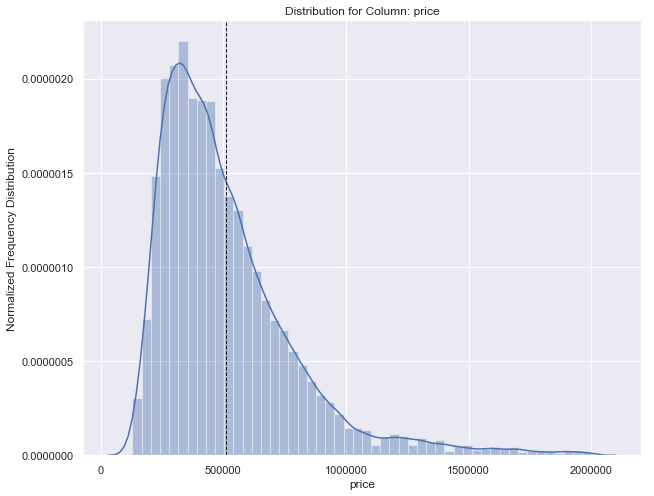

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,price
type,dep_var
n,20332
mean,512475
median,445000
stdev,278886
skew,1.79066
kurtosis,4.4639
max,2e+06
min,130000


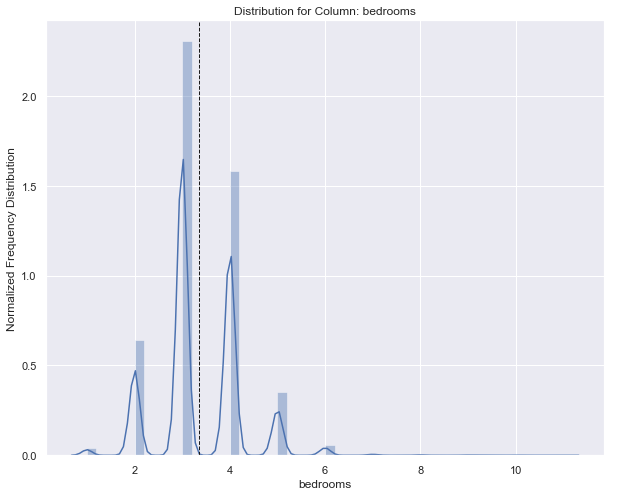

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,bedrooms
type,continuous
n,20332
mean,3.35973
median,3
stdev,0.891567
skew,0.558256
kurtosis,1.88982
max,11
min,1


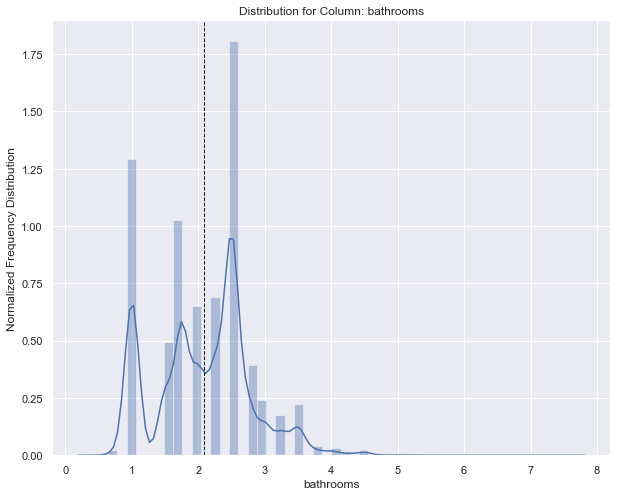

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,bathrooms
type,continuous
n,20332
mean,2.08329
median,2.25
stdev,0.726354
skew,0.248729
kurtosis,0.154664
max,7.5
min,0.5


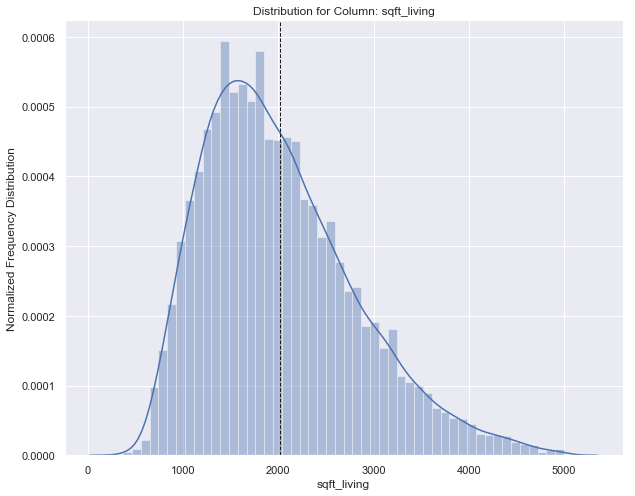

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_living
type,continuous
n,20332
mean,2012.41
median,1880
stdev,799.004
skew,0.78165
kurtosis,0.37097
max,5000
min,370


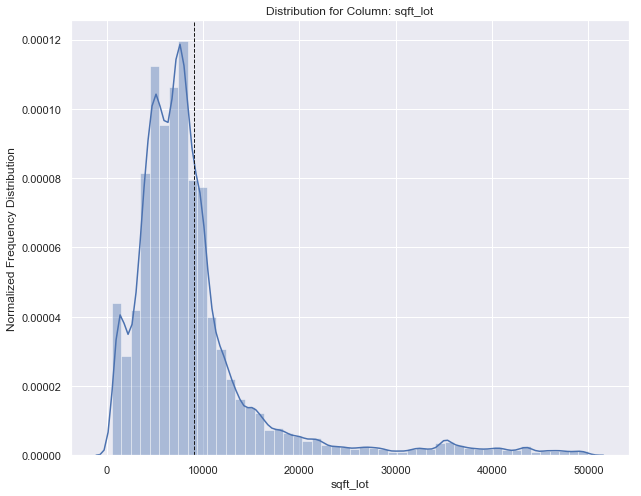

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_lot
type,continuous
n,20332
mean,9036.54
median,7401
stdev,7477.63
skew,2.76926
kurtosis,9.0964
max,49928
min,520


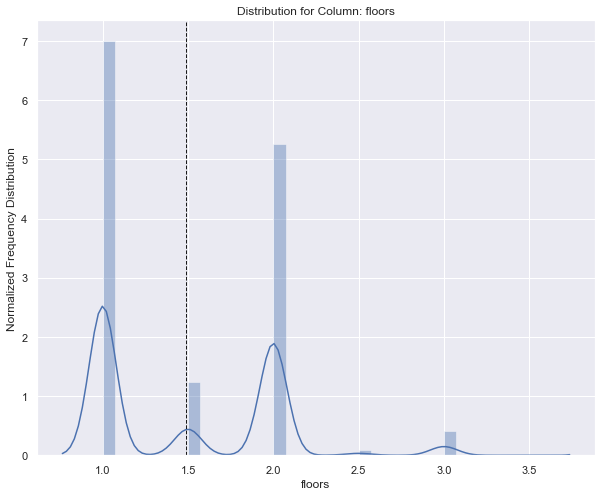

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,floors
type,continuous
n,20332
mean,1.48938
median,1.5
stdev,0.5411
skew,0.644812
kurtosis,-0.442172
max,3.5
min,1


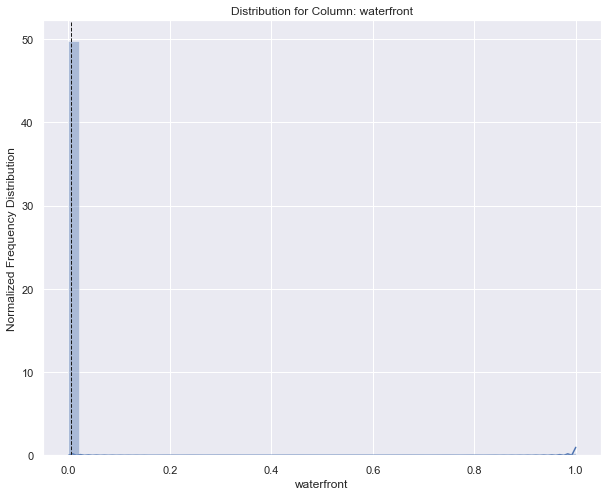

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,waterfront
type,categorical
n,20332
mean,0.00452489
median,0
stdev,0.0671166
skew,14.7661
kurtosis,216.058
max,1
min,0


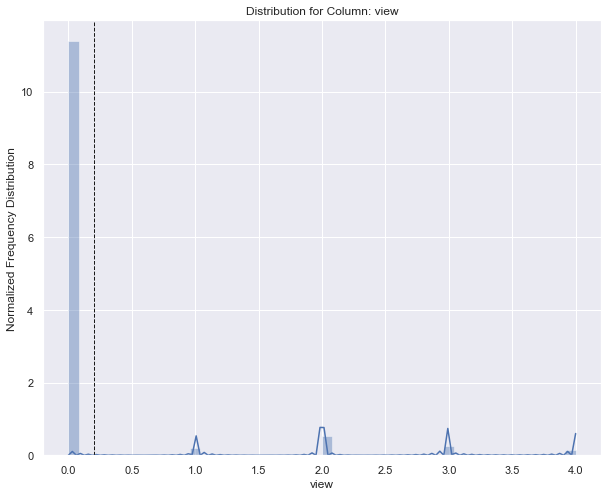

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,view
type,categorical
n,20332
mean,0.205981
median,0
stdev,0.712092
skew,3.62888
kurtosis,12.7405
max,4
min,0


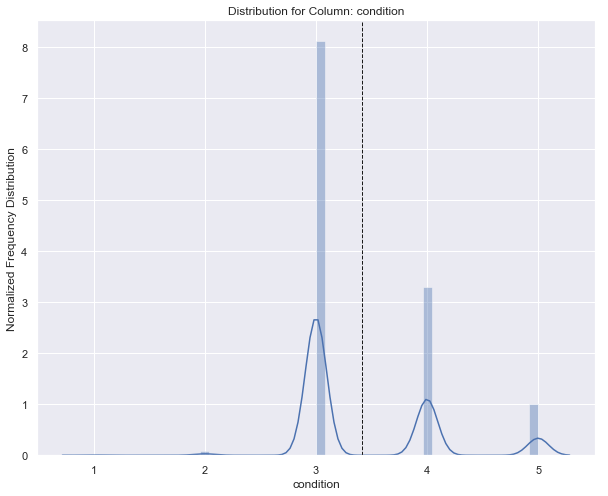

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,condition
type,continuous
n,20332
mean,3.41442
median,3
stdev,0.649404
skew,1.06314
kurtosis,0.463907
max,5
min,1


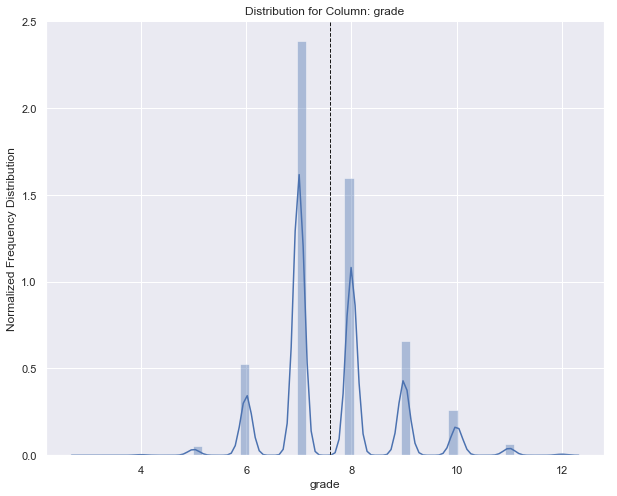

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,grade
type,continuous
n,20332
mean,7.60053
median,7
stdev,1.08824
skew,0.676831
kurtosis,0.874876
max,12
min,3


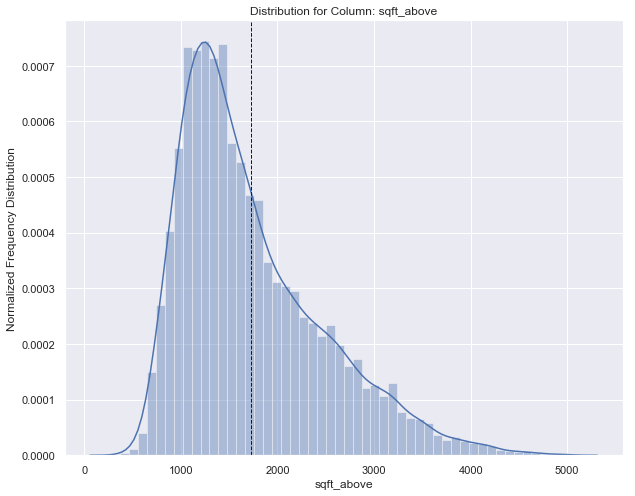

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_above
type,continuous
n,20332
mean,1730.5
median,1540
stdev,739.854
skew,1.06802
kurtosis,0.848129
max,5000
min,370


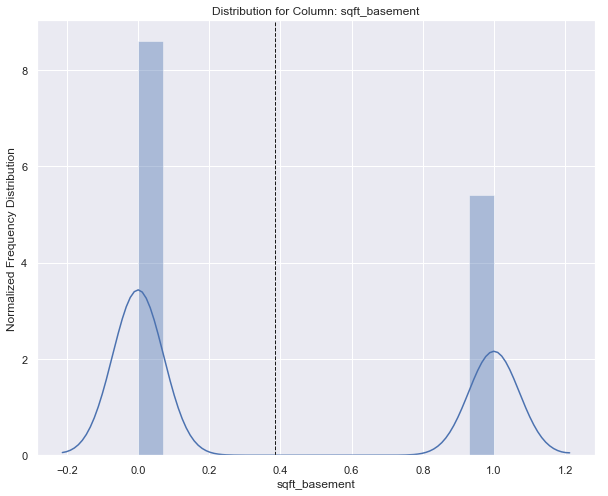

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_basement
type,categorical
n,20332
mean,0.385993
median,0
stdev,0.486841
skew,0.468402
kurtosis,-1.78077
max,1
min,0


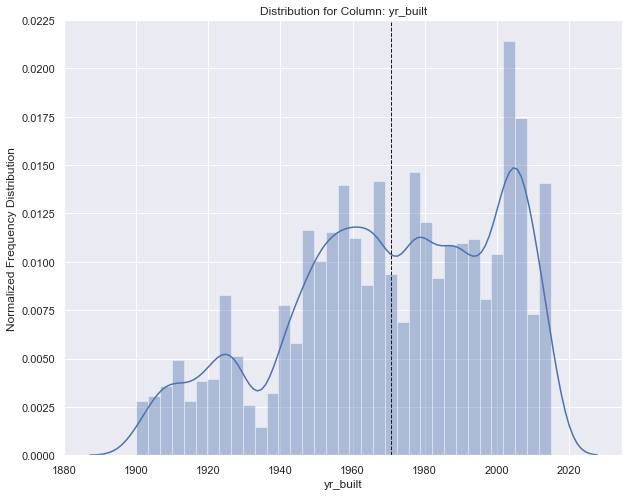

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,yr_built
type,continuous
n,20332
mean,1970.6
median,1974
stdev,29.5383
skew,-0.443542
kurtosis,-0.68491
max,2015
min,1900


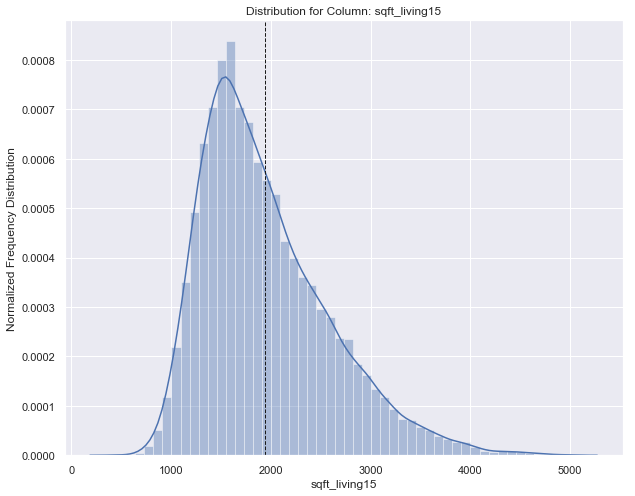

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_living15
type,continuous
n,20332
mean,1945.9
median,1810
stdev,641.152
skew,0.973808
kurtosis,0.936884
max,5000
min,460


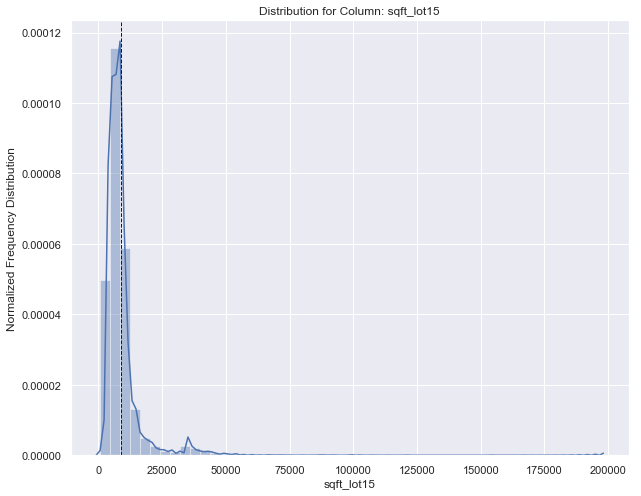

	Summary Report		Bottom 10 Value Counts	Top 10 Value Counts		Zeros Report


,summary
column,sqft_lot15
type,continuous
n,20332
mean,8860.78
median,7478
stdev,8559.18
skew,6.86543
kurtosis,90.625
max,196591
min,651


In [21]:
#re-display the summary report, with the dataframe now cleaned per the specifications
df_clean.display_summary_report()

Overall it seem's that the summary reports show some improvement in most of the columns. We can see that 'sqft_lot' and 'sqft_lot15' are still a bit problematic even after the cleaning configurations we've placed. Since we don't want to run the risk of losing further data, let's just accept this as is and proceed with caution when using these columns in our model. 

----------Displaying Multicollinearity Heatmap and Summary Report----------


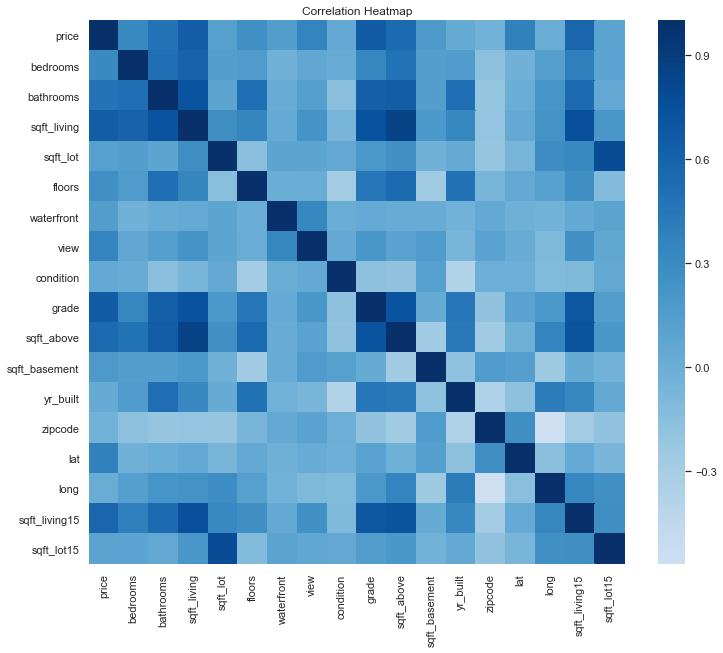

==Variable pairs with correlations > 0.75==


,pairs,corr
1,"(sqft_above, sqft_living)",0.853745
2,"(sqft_lot, sqft_lot15)",0.780489
3,"(sqft_living, sqft_living15)",0.752536


In [22]:
df_clean.display_collinearity_report()

The above cell block calls the .display_collinearity_report() method to display the multicollinearity heatmap and the variable pairs with correlations above 0.75. 

**sqft_above and sqft_living** - sqft_above represents the total square footage of the unit except for the basement and sqft_living represents the total footage of the unit overall. There is an clear redundancy in information here, hence the very high correlation. Since sqft_living is more general in nature, and would include sqft_above anyways, we can drop the column sqft_above. This would also help preserve model simplicity. 

**sqft_lot and sqft_lot15** - sqft_lot represents the lot footage, whereas sqft_lot15 represents the lot footage of the 15 nearest neighbors. High correlation here would make sense since all the houses in a particular neighborhood would have more or less similar house/lot sizes in general. To keep the focus on each unit itself, we'll drop the sqft_lot15 column.

**sqft_living and sqft_living15** - same exact scenario as above. We will drop the sqft_living15 column. 

In [23]:
df_clean.filter_cols(remove_cols=['sqft_above', 'sqft_lot15', 'sqft_living15'])
df_clean.df_clean.head()

Removed columns ['sqft_above', 'sqft_lot15', 'sqft_living15'] from all relevant dataframe attributes in instance object!


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,7,0,1955,98178,47.5112,-122.257
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,1,1951,98125,47.7210,-122.319
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,0,1933,98028,47.7379,-122.233
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1,1965,98136,47.5208,-122.393
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,0,1987,98074,47.6168,-122.045


The above cell execution calls the .fiter_cols() method to remove the aforementioned columns for removal. Now that the issue of multicollinearity is addressed, we can move onto preprocessing the data.

Let's first save this cleaned df to .csv for EDA (to be done in a different notebook). Note that all inputs are still in their original forms, and outliers have been cleaned to a certain extent.

In [24]:
#save cleaned df as csv for EDA
df_clean.df_clean.to_csv('working_datasets/df_clean_for_EDA.csv', index=False)

In [25]:
with open('module2_configs/manual_binning_config.jsonc') as f:
    manual_binning_config = json.load(f)

In [26]:
#initialize Preprocessor instance object
df_preprocessed = Preprocessor(
    df=df_clean.df_clean, 
    dep_var='price', 
    df_continuous=df_clean.df_cont_clean, 
    df_categorical=df_clean.df_cat_clean, 
    continuous_col_transform_exceptions=['date', 'lat', 'long'],
    manual_categorical_binning_config=manual_binning_config
    )

Above we've initialized a Preprocessor object, passing in some arguments, you can refer to the docstring in the processor module for further info. One thing to note are the exceptions to the continuous column transformations. We will not be log transforming and standarizing the 'date', 'lat', and 'long' columns as naturally it doesnt make sense to do so. 

In [27]:
#the below method generates the y target variable dataframe using the 
#dep_var attribute of the object
df_preprocessed.generate_y()
df_preprocessed.y.head()

=== Generating preprocessed y (target variable) dataframe as obj.y isntance attribute ===
=== Completed generating y dataframe ===


,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


The above output shows the top 5 columns of our preprocessed y dataframe. This is the target variable dataframe.

=== Generating preprocessed X (predictor variables) dataframe as obj.X instance attribute ===
=== Beginning process of log transforming and standardizing continuous variable columns ===
Exempted continuous columns for transformation: ['date', 'lat', 'long']

----------Displaying log transformed and standardized histogram plots with KDE overlay for continuous variables----------


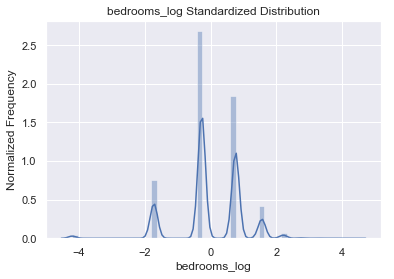

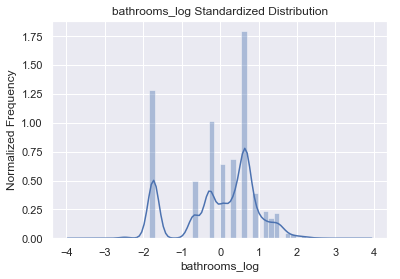

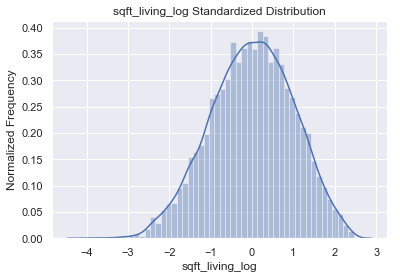

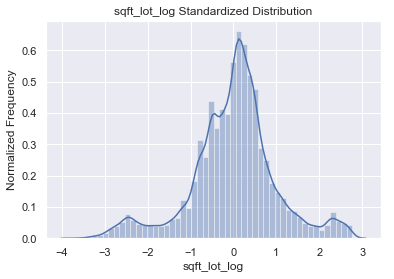

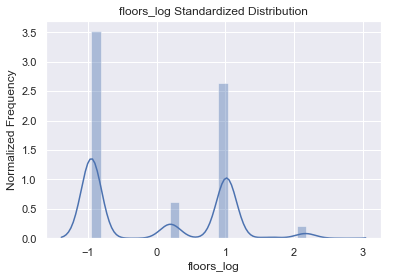

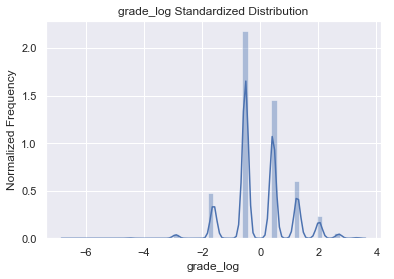

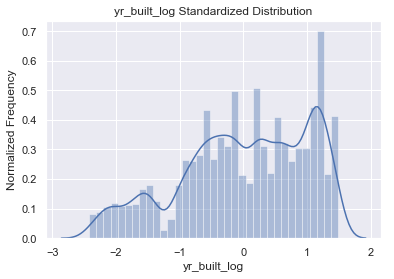

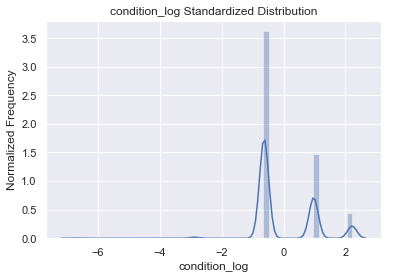

=== Completed transformation of continuous variables ===
=== Beginning process of one-hot encoding categorical variable columns ===
Exempted categorical columns for binning []
=== Completed one-hot encoding of categorical variables ===
=== Completed generating X dataframe ===


,date,lat,long,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,grade_log,yr_built_log,...,view_dummy__4,sqft_basement_dummy__1,zipcode_dummy__B,zipcode_dummy__C,zipcode_dummy__D,zipcode_dummy__E,zipcode_dummy__F,zipcode_dummy__G,zipcode_dummy__H,zipcode_dummy__I
0,2014-10-13,47.5112,-122.257,-0.273726,-1.734297,-1.133781,-0.316224,-0.94984,-0.514790,-0.520988,...,0,0,0,0,1,0,0,0,0,0
1,2014-12-09,47.7210,-122.319,-0.273726,0.378033,0.804529,0.034894,1.01561,-0.514790,-0.657145,...,0,1,0,0,0,0,0,0,0,0
2,2015-02-25,47.7379,-122.233,-1.726659,-1.734297,-2.196774,0.491309,-0.94984,-1.611564,-1.273326,...,0,0,1,0,0,0,0,0,0,0
3,2014-12-09,47.5208,-122.393,0.757146,1.127394,0.129795,-0.489091,-0.94984,-0.514790,-0.181811,...,0,1,0,0,0,0,0,0,0,0
4,2015-02-18,47.6168,-122.045,-0.273726,0.071229,-0.254063,0.189765,-0.94984,0.435280,0.558344,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#the method below generates the X predictor variavles dataframe
#for continuous columns, the method normalizes and standardizes the values, and displays
#a histogram with KDE overlay so the user can visually inspect how normalized and standardized
#the transformed distribution is.
#for categorical columns, the method performs one-hot encoding and drops the first column
df_preprocessed.generate_X()
df_preprocessed.X.head()

Above we see the standardized distribution plots of our continuous variables, which have been log transformed and then standardized. The distributions all look to be close to normal, with the means centered around 0, which means the transformation was decently successful.  

For the categorical variables, one-hot encoding was applied with the removal of the first column, a standard practice for preprocessing categorical data for multivariate regression. 

We also see the top 5 rows of our final preprocessed X dataframe.

In [29]:
df_preprocessed.generate_preprocessed()
df_preprocessed.df_preprocessed.head()

=== Generating full preprocessed dataframe as obj.df_preprocessed instance attribute ===
=== Completed generating preprocessed dataframe ===


,price,date,lat,long,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,grade_log,...,view_dummy__4,sqft_basement_dummy__1,zipcode_dummy__B,zipcode_dummy__C,zipcode_dummy__D,zipcode_dummy__E,zipcode_dummy__F,zipcode_dummy__G,zipcode_dummy__H,zipcode_dummy__I
0,221900.0,2014-10-13,47.5112,-122.257,-0.273726,-1.734297,-1.133781,-0.316224,-0.94984,-0.514790,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2014-12-09,47.7210,-122.319,-0.273726,0.378033,0.804529,0.034894,1.01561,-0.514790,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2015-02-25,47.7379,-122.233,-1.726659,-1.734297,-2.196774,0.491309,-0.94984,-1.611564,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,2014-12-09,47.5208,-122.393,0.757146,1.127394,0.129795,-0.489091,-0.94984,-0.514790,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,2015-02-18,47.6168,-122.045,-0.273726,0.071229,-0.254063,0.189765,-0.94984,0.435280,...,0,0,0,0,0,0,0,1,0,0


Above we see the top 5 rows of our total preprocessed dataframe with all variables

In [30]:
#save all dataframes to csv to further processing in a different notebook
df_preprocessed.df_preprocessed.to_csv('working_datasets/df_preprocessed.csv', index=False)
df_preprocessed.X.to_csv('working_datasets/df_preprocessed_X.csv', index=False)
df_preprocessed.y.to_csv('working_datasets/df_preprocessed_y.csv', index=False)